In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data 
data = pd.read_csv("Train.csv")
data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/3916194540.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


In [4]:
import numpy as np

data = data.replace([np.inf, -np.inf], np.nan)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/2794399694.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/2794399694.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [5]:
# create lag
import seaborn as sns

def create_lags(df, column, num_lags):

    for lag in range(1, num_lags + 1):
        df[f'lag_{lag}'] = df[column].shift(lag)
    return df


num_lags = 7
lag_data = create_lags(data, 'GT_NO2', num_lags)


In [6]:
lag_data

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,...,NO2_trop,TropopausePressure,GT_NO2,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,278.38,0.230527,0.559117,0.000024,...,0.000084,14440.82126,31.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,278.38,-0.074006,0.869309,0.000024,...,0.000084,14441.79815,42.000,31.000,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,278.38,0.024470,0.674160,0.000024,...,0.000084,14437.38294,31.000,42.000,31.000,NaN,NaN,NaN,NaN,NaN
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,278.38,-0.010442,0.920054,0.000024,...,0.000084,14440.83831,30.000,31.000,42.000,31.000,NaN,NaN,NaN,NaN
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,278.38,-0.176178,0.747464,0.000024,...,0.000084,14438.79037,58.000,30.000,31.000,42.000,31.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,ID_NCWXIY,2021-12-31,X9897,45.498227,9.556232,0.000000,283.64,-0.434350,0.250490,0.000032,...,0.000228,13063.79770,39.750,56.275,24.225,19.875,27.675,29.225,27.300,36.325
86580,ID_UDQIEE,2021-12-31,X9928,45.142541,10.043836,0.000000,283.64,-0.434350,0.250490,0.000032,...,0.000228,13063.79770,30.125,39.750,56.275,24.225,19.875,27.675,29.225,27.300
86581,ID_ENDUPX,2021-12-31,X9969,45.842207,9.351658,0.000000,284.98,-0.157753,0.000000,0.000031,...,0.000122,13050.16499,28.325,30.125,39.750,56.275,24.225,19.875,27.675,29.225
86582,ID_3ZBA6C,2021-12-31,X9993,45.113503,8.874065,0.000000,284.98,-0.798636,0.399524,0.000031,...,0.000122,13061.41329,21.250,28.325,30.125,39.750,56.275,24.225,19.875,27.675


In [7]:
lag_data.fillna(method='bfill', inplace=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/1822506313.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lag_data.fillna(method='bfill', inplace=True)


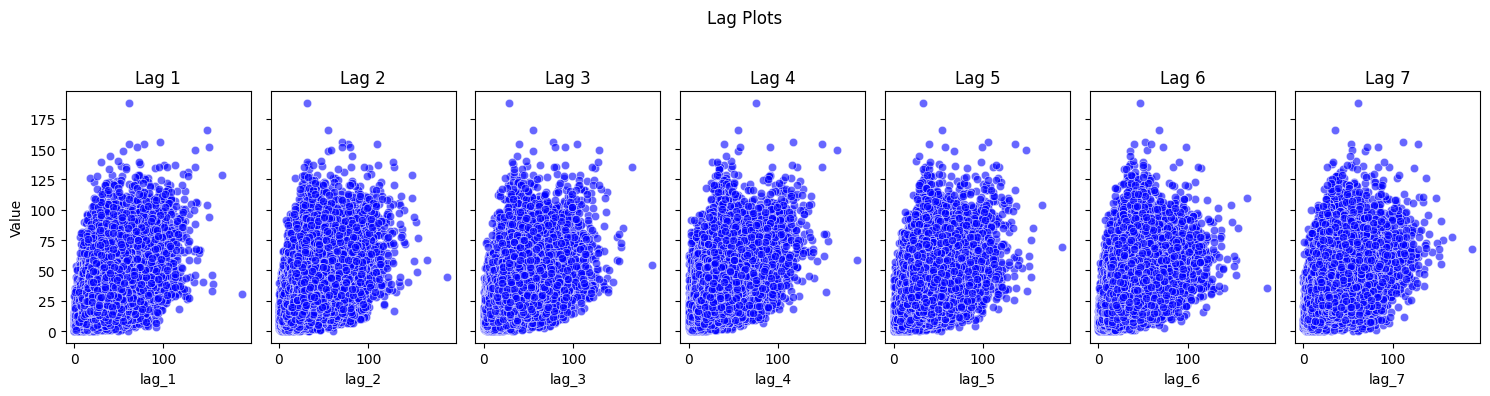

In [8]:
# Plot lagged scatter plots
fig, axes = plt.subplots(1, num_lags, figsize=(15, 4), sharey=True)
fig.suptitle('Lag Plots')

for i, ax in enumerate(axes, start=1):
    sns.scatterplot(x=data[f'lag_{i}'], y=lag_data['GT_NO2'], ax=ax, color="blue", alpha=0.6)
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'lag_{i}')
    ax.set_ylabel('Value' if i == 1 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/1692659476.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lag_data.fillna(method='bfill', inplace=True)


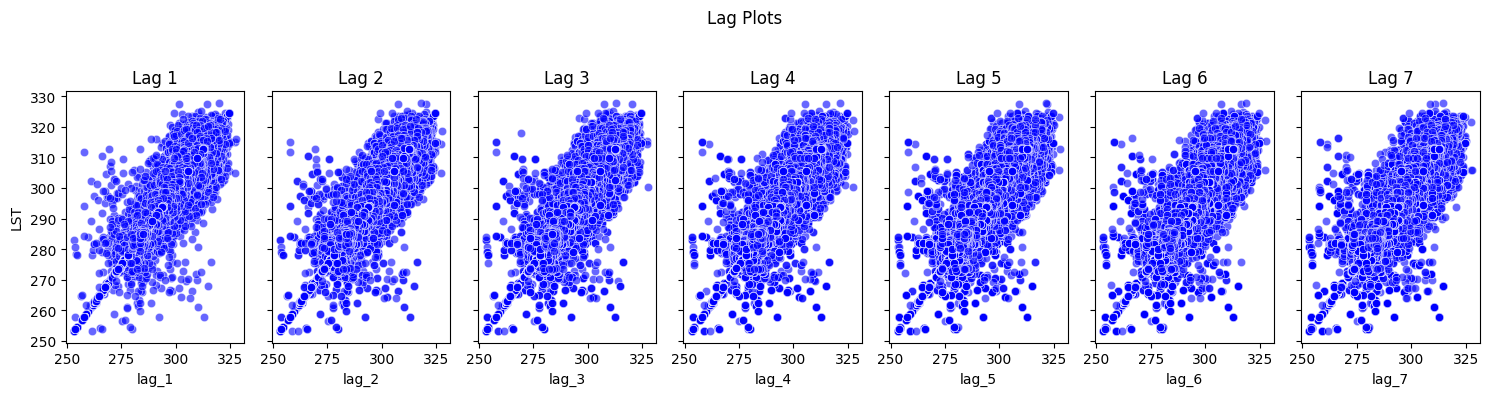

In [9]:
num_lags = 7
lag_data = create_lags(data, 'LST', num_lags)

lag_data.fillna(method='bfill', inplace=True)

# Plot lagged scatter plots
fig, axes = plt.subplots(1, num_lags, figsize=(15, 4), sharey=True)
fig.suptitle('Lag Plots')

for i, ax in enumerate(axes, start=1):
    sns.scatterplot(x=data[f'lag_{i}'], y=lag_data['LST'], ax=ax, color="blue", alpha=0.6)
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'lag_{i}')
    ax.set_ylabel('LST' if i == 1 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [10]:
# Linear Relationship 
# This means that the current value is highly dependent on the previous value.
# However, if you see strong patterns at longer lags, this could indicate the presence of cycles or seasonality.

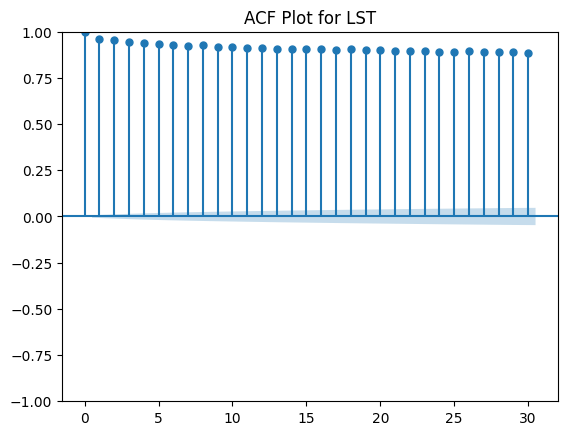

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plot_acf(data['LST'], lags=30, title="ACF Plot for LST")
plt.show()


/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/3629148233.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lag_data.fillna(method='bfill', inplace=True)


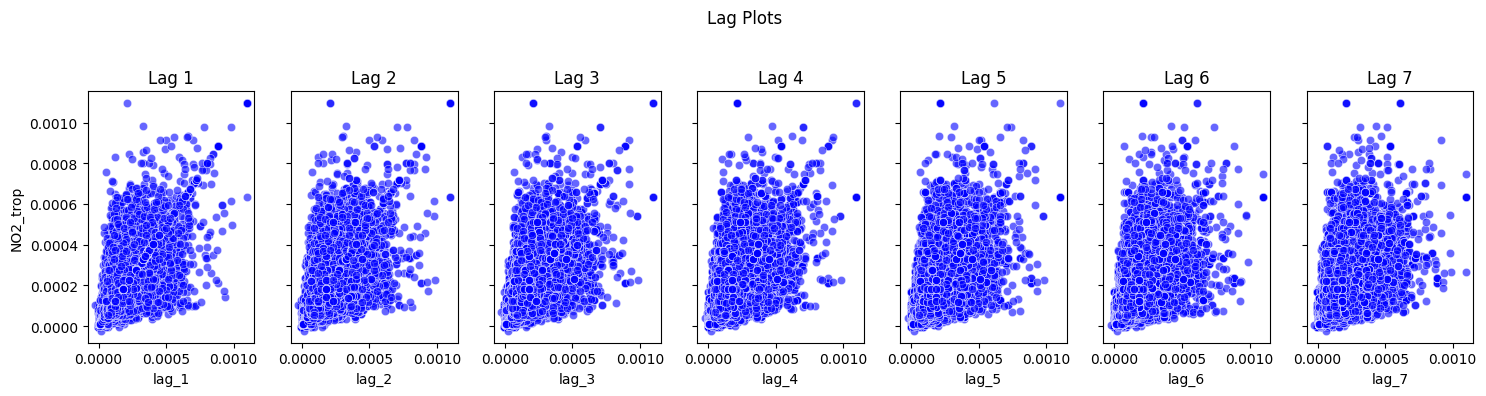

In [12]:
num_lags = 7
lag_data = create_lags(data, 'NO2_trop', num_lags)

lag_data.fillna(method='bfill', inplace=True)

# Plot lagged scatter plots
fig, axes = plt.subplots(1, num_lags, figsize=(15, 4), sharey=True)
fig.suptitle('Lag Plots')

for i, ax in enumerate(axes, start=1):
    sns.scatterplot(x=data[f'lag_{i}'], y=lag_data['NO2_trop'], ax=ax, color="blue", alpha=0.6)
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'lag_{i}')
    ax.set_ylabel('NO2_trop' if i == 1 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

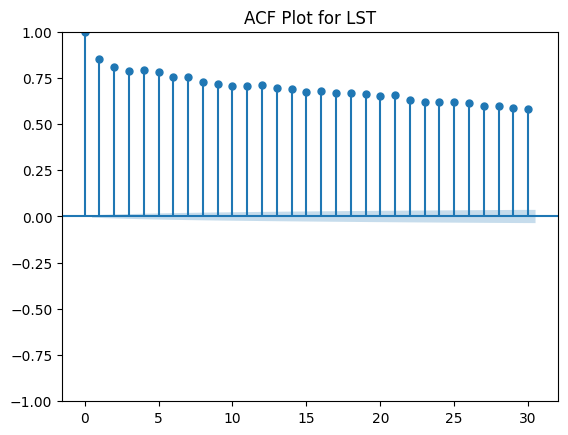

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plot_acf(data['NO2_trop'], lags=30, title="ACF Plot for LST")
plt.show()

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/3414170416.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lag_data.fillna(method='bfill', inplace=True)


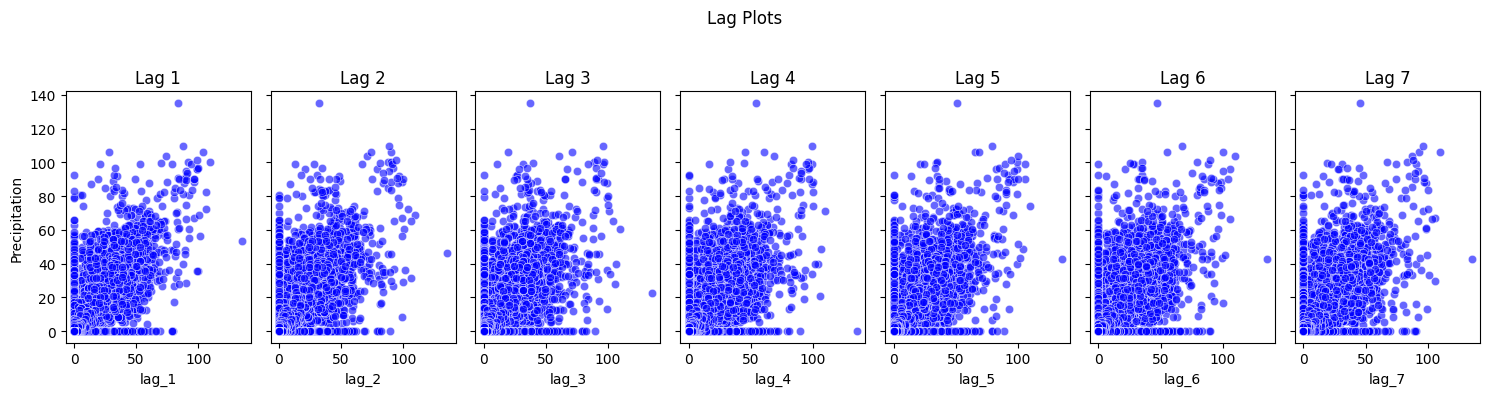

In [14]:
num_lags = 7
lag_data = create_lags(data, 'Precipitation', num_lags)

lag_data.fillna(method='bfill', inplace=True)

# Plot lagged scatter plots
fig, axes = plt.subplots(1, num_lags, figsize=(15, 4), sharey=True)
fig.suptitle('Lag Plots')

for i, ax in enumerate(axes, start=1):
    sns.scatterplot(x=data[f'lag_{i}'], y=lag_data['Precipitation'], ax=ax, color="blue", alpha=0.6)
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'lag_{i}')
    ax.set_ylabel('Precipitation' if i == 1 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/2312258973.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lag_data.fillna(method='bfill', inplace=True)


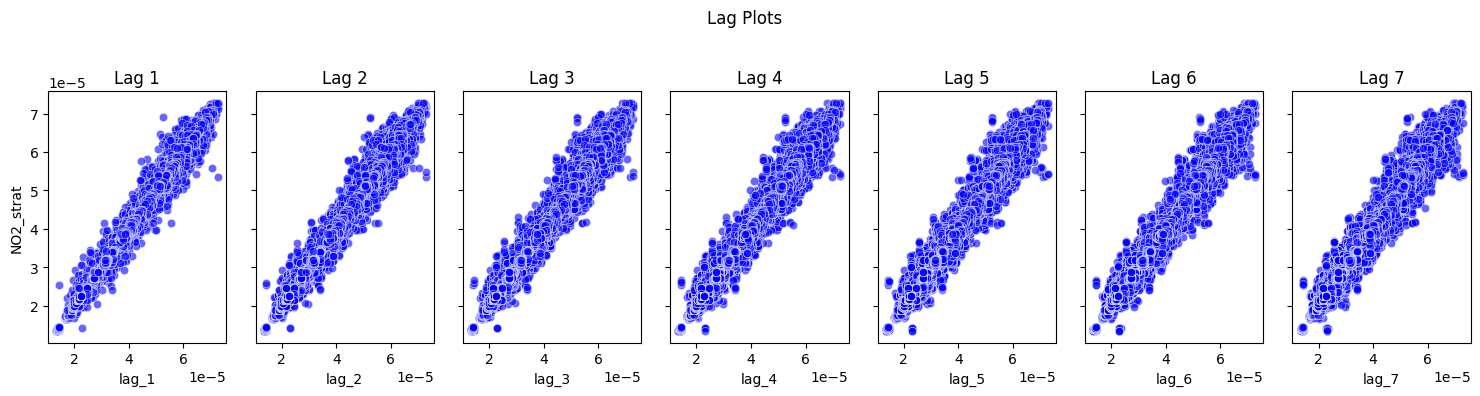

In [15]:
num_lags = 7
lag_data = create_lags(data, 'NO2_strat', num_lags)

lag_data.fillna(method='bfill', inplace=True)

# Plot lagged scatter plots
fig, axes = plt.subplots(1, num_lags, figsize=(15, 4), sharey=True)
fig.suptitle('Lag Plots')

for i, ax in enumerate(axes, start=1):
    sns.scatterplot(x=data[f'lag_{i}'], y=lag_data['NO2_strat'], ax=ax, color="blue", alpha=0.6)
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'lag_{i}')
    ax.set_ylabel('NO2_strat' if i == 1 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_39384/3428174058.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lag_data.fillna(method='bfill', inplace=True)


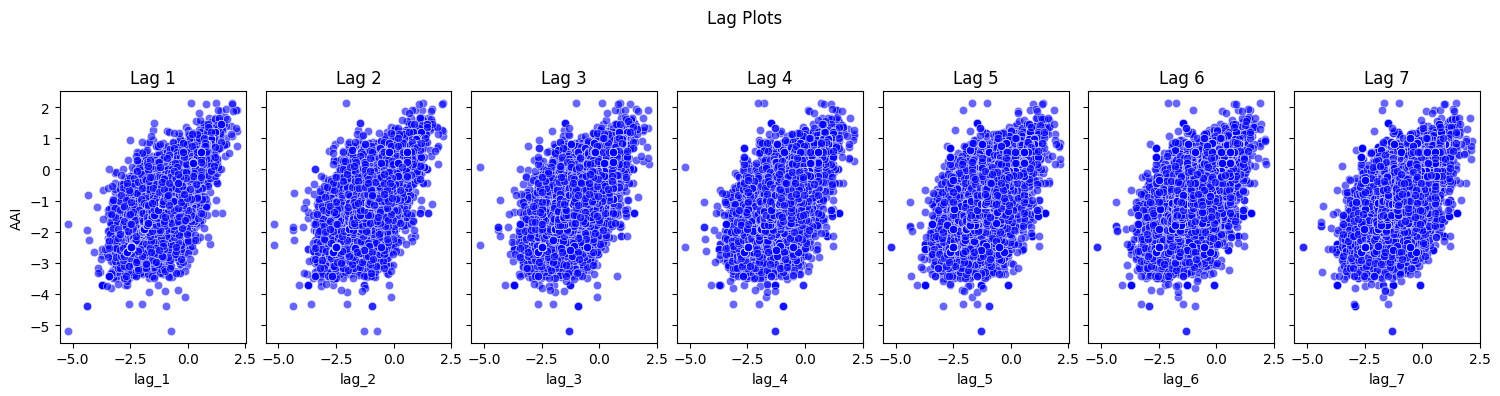

In [16]:
num_lags = 7
lag_data = create_lags(data, 'AAI', num_lags)

lag_data.fillna(method='bfill', inplace=True)

# Plot lagged scatter plots
fig, axes = plt.subplots(1, num_lags, figsize=(15, 4), sharey=True)
fig.suptitle('Lag Plots')

for i, ax in enumerate(axes, start=1):
    sns.scatterplot(x=data[f'lag_{i}'], y=lag_data['AAI'], ax=ax, color="blue", alpha=0.6)
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'lag_{i}')
    ax.set_ylabel('AAI' if i == 1 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

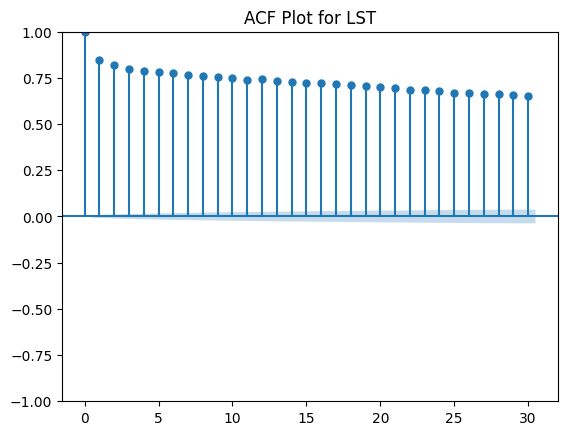

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plot_acf(data['AAI'], lags=30, title="ACF Plot for LST")
plt.show()